In [1]:
import sys

In [ ]:
!pip install tensorflow

In [2]:
print(sys.version)

3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]


In [2]:
import tensorflow as tf
print(tf.__version__)


2.20.0


In [3]:
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.layers import Dense ,Flatten

In [4]:
# Load Dataset 
(X_train , y_train) , (X_test,y_test)  = mnist.load_data()
print("X_train shape:" , X_train.shape ," // (number of images, height(in pixels), width)")
print("X_test shape:" , X_test.shape)
print("y_train shape:" , y_train.shape)
print("y_test shape:" , y_test.shape)

X_train shape: (60000, 28, 28)  // (number of images, height(in pixels), width)
X_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


## Each image is a 28* 28 grid of pixels (each pixel store a grayscale value(0-255 before normalization))

In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
## First convert the data into 0/1 form 
X_test = X_test/255
X_train = X_train/255

In [12]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Ann cannot directly use(28 , 28) ; Ann exepts 1D input so we need to convert it 28* 28 = 784 this is called flattening 

In [6]:
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Flatten(input_shape =(28,28))) # (28,28)->(784,)
model.add(Dense(128 , activation = 'relu'))#128 is a popular default.
model.add(Dense(30 , activation = 'relu'))
model.add(Dense(10,activation = 'softmax')) ## 10 outputs (0-9)

C:\Users\Charanjot Kaur\anaconda3\envs\digit_ann\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         3,870 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           310 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,660 (408.83 KB)

 Trainable params: 104,660 (408.83 KB)

 Non-trainable params: 0 (0.00 B)

## Now we will complpile the model - need to tell the loss function 
- we have used 'sparse_categorical_crossentropy' not 'categorical_crossentropy' bcoz the labels are integer 0-9

In [8]:
model.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

## Train the Model 
### During training:

- forward pass → prediction

- loss calculation

- backpropagation

- weight update

- repeat

In [9]:
history = model.fit(X_train,y_train,epochs=20,validation_split = 0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9176 - loss: 0.2886 - val_accuracy: 0.9568 - val_loss: 0.1516
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9640 - loss: 0.1221 - val_accuracy: 0.9598 - val_loss: 0.1359
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9740 - loss: 0.0860 - val_accuracy: 0.9709 - val_loss: 0.0965
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9810 - loss: 0.0616 - val_accuracy: 0.9678 - val_loss: 0.1003
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9841 - loss: 0.0499 - val_accuracy: 0.9724 - val_loss: 0.0966
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9875 - loss: 0.0389 - val_accuracy: 0.9751 - val_loss: 0.0869
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9894 - loss: 0.0323 - val_accuracy: 0.9707 - val_loss: 0.1079
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9912 - loss: 0.027

In [10]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step   


In [11]:
y_pred = y_prob.argmax(axis=1)

In [31]:
!pip install scikit-learn


In [12]:
import sklearn

In [13]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test , y_pred)

0.9785

In [16]:
import matplotlib.pyplot as plt 

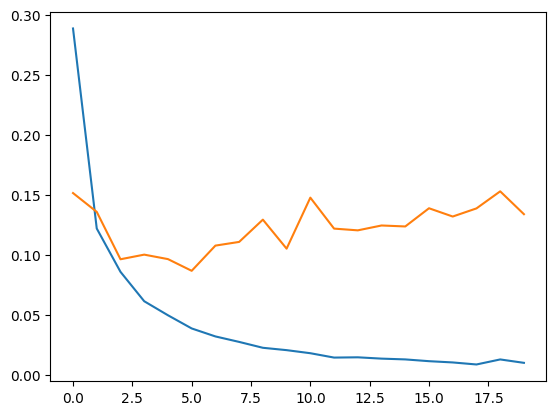

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

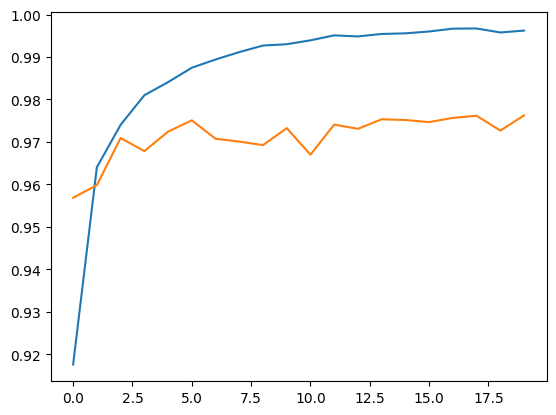

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [18]:
model.save("digit_ann_model.h5")

In [38]:
model.save("digit_ann_model.keras")


In [21]:
import os
print(os.listdir())


['.ipynb_checkpoints', 'digit_ann_model.h5', 'digit_ann_model.keras', 'MNIST(Numerical Digits Prediction).ipynb', 'st_se101_256_fine_test_prob_TTA_stage2_finetune.csv', 'Untitled.ipynb']


In [ ]:
model.accuracy()